<a href="https://colab.research.google.com/github/priyankadalmia/Blog/blob/main/Model_Explanation_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Explanation: Predicting Diabetes

In [ ]:
!pip install -U scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [ ]:
diabetes_df = pd.read_csv( "https://raw.githubusercontent.com/priyankadalmia/Blog/main/diabetes.csv", index_col=[0] )

In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 6 to 1
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 54.0 KB


### Encode the Categorical Variable

In [ ]:
X_features = list( diabetes_df.columns )

In [ ]:
X_features.remove( "Outcome" )

### Split the dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, \
y_train, y_test = train_test_split( diabetes_df[X_features],
                                    diabetes_df.Outcome,
                                    test_size = 0.3,
                                    random_state = 100 )

In [ ]:
X_train.shape

(537, 7)

In [ ]:
X_test.shape

(231, 7)

### Build a RandomForest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier( n_estimators = 100,
                                 max_features = 0.2,
                                 max_depth = 10,
                                 max_samples = 0.5)

In [ ]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=0.2, max_samples=0.5)

In [ ]:
y_pred_prob = rf_clf.predict_proba( X_test )[:,1]
y_pred = rf_clf.predict( X_test )

## Understanding the Model using ELI5

- Install ELI5

```code
pip install eli5
```

In [ ]:
!pip install eli5

     |████████████████████████████████| 106 kB 11.7 MB/s 


In [ ]:
import eli5.sklearn

In [ ]:
eli5.explain_weights( 
    rf_clf, 
    feature_names = X_features )

Explanation(estimator='RandomForestClassifier(max_depth=10, max_features=0.2, max_samples=0.5)', description='\nRandom forest feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='Glucose', weight=0.25468035042244563, std=0.09988027158538289, value=None), FeatureWeight(feature='Age', weight=0.15945109994808113, std=0.0681830567277058, value=None), FeatureWeight(feature='BMI', weight=0.15757380544658056, std=0.06932126310837776, value=None), FeatureWeight(feature='DiabetesPedigreeFunction', weight=0.1393752688598206, std=0.06774928647252378, value=None), FeatureWeight(feature='BloodPressure', weight=0.10712904033280451, std=0.04016032423383254, value=None), FeatureWeight(feature='SkinThickness', weight=0.09683575335002673, std=0.04104798736025598, value=None), FeatureWeight(feature='Insulin', weight=0.08495468164024078, std=0.042618607266007164, value=None)], remaining=0), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

The above output provides a global explanation

### Explaining the weights for a diabetes Person

In [ ]:
X_test.iloc[8]

Glucose                     196.000
BloodPressure                76.000
SkinThickness                36.000
Insulin                     249.000
BMI                          36.500
DiabetesPedigreeFunction      0.875
Age                          29.000
Name: 1, dtype: float64

In [ ]:
y_test.iloc[8]

1

In [ ]:
eli5.explain_prediction( rf_clf,
                         X_test.iloc[0],
                         target_names = ['Non-diabetes', 'Diabetes'] )

Explanation(estimator='RandomForestClassifier(max_depth=10, max_features=0.2, max_samples=0.5)', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target='Non-diabetes', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.6527985074626866, std=None, value=1.0), FeatureWeight(feature='Glucose', weight=0.1407253649099066, std=None, value=79.0), FeatureWeight(feature='Age', weight=0.11003158138565428, std=None, value=23.0), FeatureWeight(feature='Insulin', weight=0.04738164130855846, std=None, value=48.0), FeatureWeight(feature='BloodPressure', weight=0.03865869981616077, std=None, value=60.0)], neg=[FeatureWeight(feature='BMI', weight=-0.08618965866772033, std=None, value=43.5), FeatureWeight(feature='SkinThickness', weight=-0.05082091038654962, std=None, value=42.0), FeatureWeight(feature='DiabetesPedigreeFunction', weight=-0.04443707768054857, std=None, value=0.6779999999999999)], pos_remaining=0, neg_remaining=0), proba=0.8081481481481481, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

Here we can predict Diabetes with a probability of 0.707. From the output we can interpret that the glucose level and insulin level are high.

### Explaining the weights for a Non-diabetes Person

In [ ]:
X_test.iloc[0]

Glucose                     79.000
BloodPressure               60.000
SkinThickness               42.000
Insulin                     48.000
BMI                         43.500
DiabetesPedigreeFunction     0.678
Age                         23.000
Name: 1, dtype: float64

In [ ]:
y_test.iloc[0]

0

In [ ]:
eli5.explain_prediction( rf_clf,
                         X_test.iloc[4],
                         target_names = ['Non-diabetes', 'Diabetes'] )

Explanation(estimator='RandomForestClassifier(max_depth=10, max_features=0.2, max_samples=0.5)', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target='Non-diabetes', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.6527985074626866, std=None, value=1.0), FeatureWeight(feature='Insulin', weight=0.044786732202160014, std=None, value=94.0), FeatureWeight(feature='DiabetesPedigreeFunction', weight=0.03069707792289092, std=None, value=0.374), FeatureWeight(feature='Glucose', weight=0.02923885215470672, std=None, value=123.0), FeatureWeight(feature='BloodPressure', weight=0.01660277286519355, std=None, value=70.0)], neg=[FeatureWeight(feature='Age', weight=-0.13442393076361475, std=None, value=40.0), FeatureWeight(feature='SkinThickness', weight=-0.07045288747616212, std=None, value=44.0), FeatureWeight(feature='BMI', weight=-0.040954095700727104, std=None, value=33.1)], pos_remaining=0, neg_remaining=0), proba=0.5282930286671338, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

Here we can predict Non-Diabetes case with a probability of 0.528. From the output we can interpret that the glucose level and insulin level are low.

## Partial Dependece Plots (PDPs) 

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

### Effect of Insulin on Diabetes

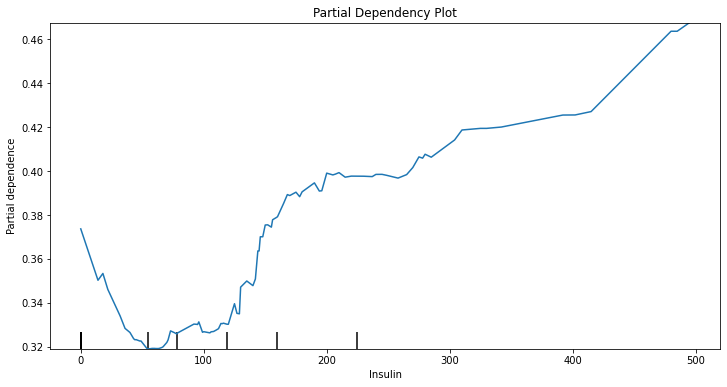

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Partial Dependency Plot")
PartialDependenceDisplay.from_estimator(rf_clf,
                                        X_test,
                                        features = ['Insulin'],
                                        feature_names = X_features,
                                        ax = ax);

Using PDP plot, we can see that initially diabetes level is high then it decreases at the level when insulin is normal. The chances of diabetes increases again with rising insulin.

### Effect of Glucose on Diabetes

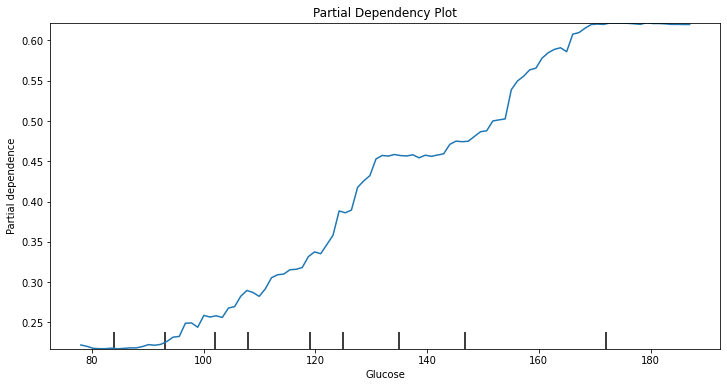

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Partial Dependency Plot")
PartialDependenceDisplay.from_estimator(rf_clf,
                                        X_test,
                                        features = ['Glucose'],
                                        feature_names = X_features,
                                        ax = ax)

With increasing level of glucose, the probability of diabetes increases

## LIME - Local Interpretation of Model Explanation

In [ ]:
!pip install lime


     |████████████████████████████████| 275 kB 12.0 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=75ab302b7bbd62f68e3ad89fefb10999d72bb51a2335986727a6763b935044bc
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular

In [ ]:
explainer = (lime
             .lime_tabular
             .LimeTabularExplainer(training_data = X_train.to_numpy(), 
                                   training_labels = y_train,                                   
                                   feature_names = X_features, 
                                   class_names = ['Non-diabetes','Diabetes'],
                                   kernel_width=3,
                                   verbose = True ))

### Explaining a case of Non-Diabetes

In [ ]:
X_test.iloc[0]

Glucose                     79.000
BloodPressure               60.000
SkinThickness               42.000
Insulin                     48.000
BMI                         43.500
DiabetesPedigreeFunction     0.678
Age                         23.000
Name: 1, dtype: float64

In [ ]:
exp = explainer.explain_instance( X_test.iloc[0].to_numpy(), 
                                  rf_clf.predict_proba )

Intercept 0.4072972081493803
Prediction_local [0.27925716]
Right: 0.19185185185185183


In [ ]:
exp.show_in_notebook(show_table=True, show_all=False)

The features contributing towards Non-diabetes(indicated in blue) are Glucose <=100 , Age <=24, Insulin between 0-122, BP <=62.The model is explaining Non-Diabetes scenario with probability of 0.81.

### Explaining a case of Diabetes

In [ ]:
exp = explainer.explain_instance( X_test.iloc[8].to_numpy(), 
                                  rf_clf.predict_proba )

Intercept 0.2323088473809387
Prediction_local [0.75167302]
Right: 0.698310387932481


In [ ]:
exp.show_in_notebook(show_table=True, show_all=False)

The features contributing towards diabetes(indicated in orange) are Glucose >140 , BMI > 36.30, Insulin > 122, BP > 72.The model is explaining Diabetes case with probability of 0.70.

### Using Shapley Values

- Install SHAP

<code>
pip install shap
</code>

In [ ]:
!pip install shap

     |████████████████████████████████| 371 kB 11.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509254 sha256=d5109e5258e4fa695925821d3da53af3e185b9665f185f2ad347abae48846171
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


In [ ]:
import shap

### Explaining a case of Non-diabetes

In [ ]:
row_to_show = 1
data_for_prediction = X_test.iloc[row_to_show]
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
rf_clf.predict_proba(data_for_prediction_array)

array([[0.90141553, 0.09858447]])

In [ ]:
explainer = shap.TreeExplainer(rf_clf)

shap_values = explainer.shap_values(data_for_prediction_array)

In [ ]:
shap.initjs()
shap.force_plot( explainer.expected_value[1], 
                 shap_values[1], 
                 data_for_prediction,
                 figsize=(20, 2) )

This is a case of Non-Diabetes. Here all the features except **BMI** is moving away from the base value. 

### Explaining a case of Diabetes

In [ ]:
row_to_show = 4
data_for_prediction = X_test.iloc[row_to_show]
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
rf_clf.predict_proba(data_for_prediction_array)

shap_values = explainer.shap_values(data_for_prediction_array)

shap.initjs()
shap.force_plot( explainer.expected_value[1], 
                 shap_values[1], 
                 data_for_prediction,
                 figsize=(20, 2) )

This is a case of Diabetes. Here most of the features is moving towards the base value. Here the features contributing towards explanation of diabetes are high values of BMI, SkinThickness and Age 

### Global Explanation of SHAP

In [ ]:
explainer = shap.TreeExplainer( rf_clf )
shap_values = explainer.shap_values( X_train )

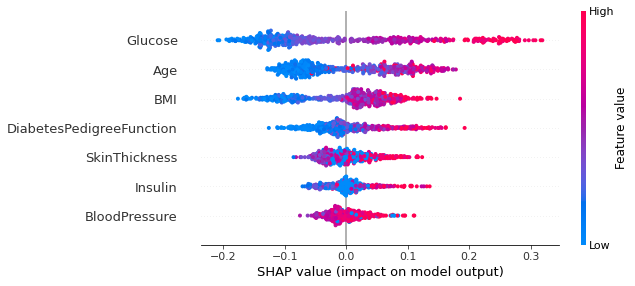

In [ ]:
shap.summary_plot( shap_values[1], X_train, plot_type = 'dot' )


The summary plot in SHAP provides global explanation of the model.

In [ ]:
explainer.expected_value

array([0.65279851, 0.34720149])

In [ ]:
shap.initjs()
shap.force_plot( explainer.expected_value[1], 
                 shap_values[1], 
                 X_train )

Here we can also filter different features and see their effect.

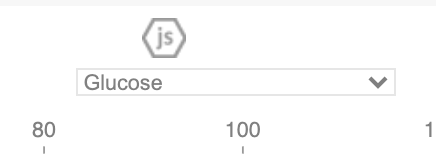

### Individual Conditional Expectations (ICE)

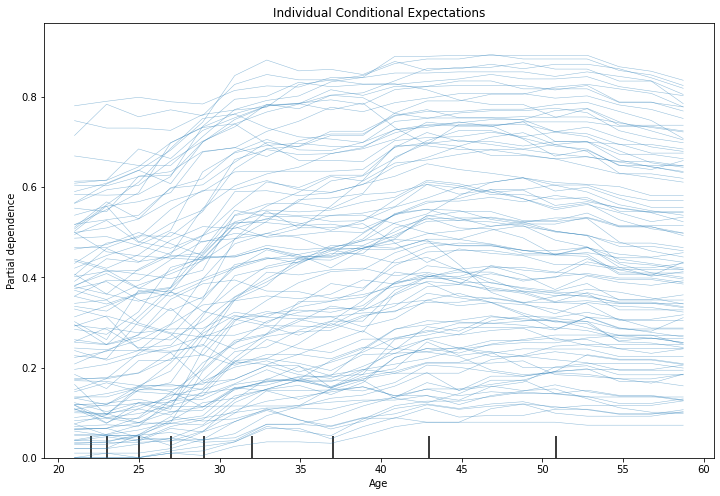

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Individual Conditional Expectations")

display = PartialDependenceDisplay.from_estimator(
    rf_clf,
    X_train,
    features=["Age"],
    kind="individual",
    subsample=100,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.5, "linewidth": 0.5},
    ax = ax
)

Using ICE, we can see the effect of **Age** on the target variable, keeping other features constant.

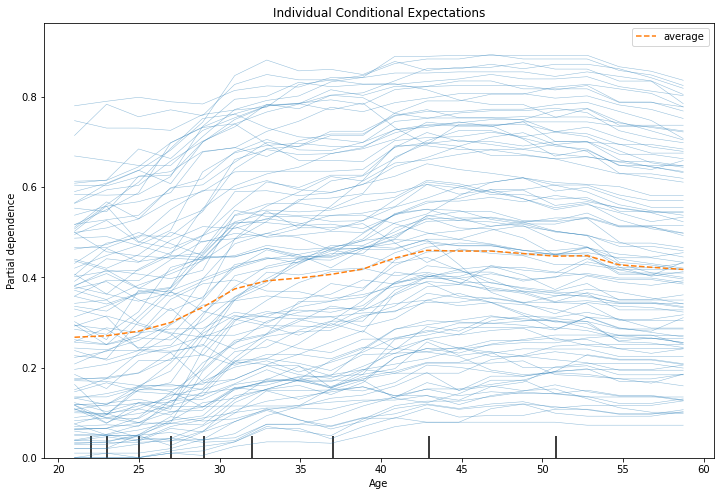

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Individual Conditional Expectations")

display = PartialDependenceDisplay.from_estimator(
    rf_clf,
    X_train,
    features=["Age"],
    kind="both",
    subsample=100,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.5, "linewidth": 0.5},
    pd_line_kw={"color": "tab:orange", "linestyle": "--"},
    ax = ax
)

Using  kind="both", we can visualise PDP and ICE in a same diagram.